<a href="https://colab.research.google.com/github/Audeon/fastai_Notebooks/blob/main/Chapter_3_Digit_Identification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Digit identification project

In this project we are going to use basic digit identification of 3, and 7. We will use the MNIST dataset in this case. 

I have split the notbook up into sections to make it easier for me to reference in the future. This doesnt really refelct the breakup in the book. Covers points i find most useful.

# Imports

In [1]:
!pip install -q fastai --upgrade
!pip install -q fastbook --upgrade

     |████████████████████████████████| 189 kB 7.4 MB/s 
     |████████████████████████████████| 56 kB 4.9 MB/s 
     |████████████████████████████████| 720 kB 8.1 MB/s 
     |████████████████████████████████| 48 kB 6.3 MB/s 
     |████████████████████████████████| 1.2 MB 51.1 MB/s 
     |████████████████████████████████| 51 kB 402 kB/s 
     |████████████████████████████████| 558 kB 75.4 MB/s 
     |████████████████████████████████| 130 kB 69.1 MB/s 


In [2]:
from fastbook import *
from fastai import *
from fastai.vision.all import *


# Getting the MNIST dataset and turning it into tensors
In this section we are going to get the MNIST dataset, do some experimenting on it, including turning them into tensors and visualizing those tensors the way the computer does.

First we will get the MNIST dataset and untar it into the path variable.

In [3]:
path = untar_data(URLs.MNIST)

We can use the LS command with any paths we create using untar to see what is in that directory. We can also view the subdirectories, as seen in the second block of code here.

In [4]:
 path.ls()

(#2) [Path('/root/.fastai/data/mnist_png/testing'),Path('/root/.fastai/data/mnist_png/training')]

In [5]:
sevens = (path/'training'/'7').ls().sorted()
threes = (path/'training'/'3').ls().sorted()

Now that we have all of the datasets untarred and in useful arrays lets work display a few of them.

In [6]:
img3_path = threes[242]
im3 = Image.open(img3_path)
im3

In [7]:
img3_path = threes[1]
im3 = Image.open(img3_path)
im3

For us to do any work on the images of course they need to be converted to a tensor or an array. Here we have an example of each. Notice in the second example we used the 4:10 to indicate we want rows from indext 4 to index 10 and the same for the columns. 

In [8]:
array(im3)

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  29, 150, 195, 254, 255, 254, 176, 193, 150,  96,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  48, 166, 224, 253, 253, 234, 196, 253, 253, 253, 253, 233,   0

In [9]:
tensor(im3)[4:15, 4:22]

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,  29, 150, 195, 254, 255, 254, 176, 193, 150,  96,   0,   0,   0],
        [  0,   0,   0,  48, 166, 224, 253, 253, 234, 196, 253, 253, 253, 253, 233,   0,   0,   0],
        [  0,  93, 244, 249, 253, 187,  46,  10,   8,   4,  10, 194, 253, 253, 233,   0,   0,   0],
        [  0, 107, 253, 253, 230,  48,   0,   0,   0,   0,   0, 192, 253, 253, 156,   0,   0,   0],
        [  0,   3,  20,  20,  15,   0,   0,   0,   0,   0,  43, 224, 253, 245,  74,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 249, 253, 245, 126,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,  14, 101, 223, 253, 248, 124,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,  11, 166, 239, 253, 253, 253, 187,  30,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,  16, 248, 250, 253, 253, 253, 253, 232, 213, 111,   2,   0,   0],


We can use panads Dataframe to color code each of the tensor cells on a gradiant. 

In [10]:
im3_t = tensor(im3)
df = pd.DataFrame(im3_t[4:15,4:22])
df.style.set_properties(**{'font-size': '6pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,29,150,195,254,255,254,176,193,150,96,0,0,0
2,0,0,0,48,166,224,253,253,234,196,253,253,253,253,233,0,0,0
3,0,93,244,249,253,187,46,10,8,4,10,194,253,253,233,0,0,0
4,0,107,253,253,230,48,0,0,0,0,0,192,253,253,156,0,0,0
5,0,3,20,20,15,0,0,0,0,0,43,224,253,245,74,0,0,0
6,0,0,0,0,0,0,0,0,0,0,249,253,245,126,0,0,0,0
7,0,0,0,0,0,0,0,14,101,223,253,248,124,0,0,0,0,0
8,0,0,0,0,0,11,166,239,253,253,253,187,30,0,0,0,0,0
9,0,0,0,0,0,16,248,250,253,253,253,253,232,213,111,2,0,0


# Pixel Similarity - Start
In this section we are going to discuss and start working through pixel similarity. This work will also cover the next few sections.



---


**Chapter 3: Stop and Think: How might a computer be able to recognize these two digits? What kinds of features might it beable to look at? How might it be able to idenfity these features? How could it combine them?**

My Answers: I sort of understand the method behind this. One of the featurs we will be looking at are the edges. EG in the above example we see that there is a curve, well one curve in the upper right quadrant might indicate a 0, 8, 7, 4, 3, 2. Next we will look at the lower right quadrant, where see the curve from the above zone peak in and then come back out toward the bottom and out of frame. This feature (the curve) narrows down the possibilities to 8,3 more or less. By breaking down the numbers into individual elements and then building them back up into their full self we can easily build filters around those features. 


---


First we are going to try Pixel Similarity. We will find the average value of every pixel of the 3s and 7s. This will give us what an "idea" 3 and 7 would look like. This should allow us to identify the difference between 7 and 3. 

First lets put all the images into a single tensor. This cool trick is called a List Comprehension. Essentally it looks like this
`new_list = [f(o) for o in a_list if o>]` This is a much more efficent way to make new lists than the typical larger loops. 

In [11]:
seven_tensors = [tensor(Image.open(o)) for o in sevens]

In [12]:
three_tensors = [tensor(Image.open(o)) for o in threes]

In [13]:
len(three_tensors), len(seven_tensors)

(6131, 6265)

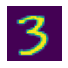

In [14]:
show_image(three_tensors[1])

Now since we are going to get the average pixel density for each of the images in order to build our prediction, we need to stack. PyTorch comes with a handy dandy stack function that allows this to happen. This stacking will create what is called a rank 3 tensor. This act of stacking various tensors is very useful for performing various actions on large datasets. So building these rank 3 tensors is important. 

Also some important information to remember. Rank is the number of axes or dimensions in a tensor. Shape is the size of each of the axis of the tensor. For example when we stack these tensors we will have 3 dimensions: Number of images (6265), size of image width (28), size of image height (28). You cans ee this using the tensor.shape call. The length of the shape is the rank. eg:
```rank = len(tensor.shape)```

Dimension can sometimes be used for the size of an axis (space is three dimensional) where other times it is used for the rank or number of axes (a two dimenional matrix). It can be useful to break down terms into ranks, axis, and length. 


In [15]:
stacked_sevens = torch.stack(seven_tensors).float()/255
stacked_sevens.shape

torch.Size([6265, 28, 28])

In [16]:
stacked_threes = torch.stack(three_tensors).float()/255
stacked_threes.shape

torch.Size([6131, 28, 28])

In [17]:
len(stacked_threes.shape)

3

And of course since this is a whole fancy framework we can get the tensors rank directly with ```tensor.ndim``` as shown below.

In [18]:
stacked_threes.ndim

3

Now we that we have rank 3 stacked tensors we can calculate the mean along dimension 0 of the tensor.... that is the this is the dimension that indexes over all the images. This will give us the "idea" image for each number. That is if most of the pixels in any future image match this idea image of these numbers than there is a high likelyhood that the image will be which ever it matchs. 

(torch.Size([28, 28]),
 <matplotlib.axes._subplots.AxesSubplot at 0x7fd0bdd92810>)

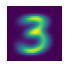

In [19]:
mean3 = stacked_threes.mean(0)

mean3.shape, show_image(mean3)

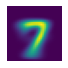

In [20]:
mean7 = stacked_sevens.mean(0)
show_image(mean7)

# Mean Absoulte Difference & Root Mean Squared Error
In this section we start to explore how to find the difference between our idea image and our sample.


---
**Chapter 3: Stop And Think - How would you calculate how similar a particular image is to each of our ideal digits?**


In [45]:
a_3 = stacked_threes[1]
a_7 = stacked_sevens[1]

(<matplotlib.axes._subplots.AxesSubplot at 0x7fd0bd8dea10>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fd0bd89c750>)

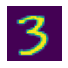

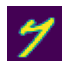

In [46]:
show_image(a_3), show_image(a_7)

In order to find the difference between any random 3 and our "idea" image of a 3, we have a few options.

First we have the Mean Absoulte Difference or L1 Norm, which takes the mean of the absolute value of the differences. 

In [23]:
dist_3_abs = (a_3 - mean3).abs().mean()
dist_7_abs = (a_3 - mean7).abs().mean()

dist_3_abs, dist_7_abs

(tensor(0.1114), tensor(0.1586))

Next we have the Root Mean Squared Error (RMSE) or L2 Norm, takes the mean of the square of the differences (this makes it all positive) and then take the square root (this undoes the squaring). 

In [24]:
dist_3_sq = ((a_3 - mean3)**2).mean().sqrt()
dist_7_sq = ((a_3 - mean7)**2).mean().sqrt()
dist_3_sq, dist_7_sq

(tensor(0.2021), tensor(0.3021))

And Pytorch gives you a quick and easy function to use the L1 or L2 Norm. 

In [25]:
F.l1_loss(a_3, mean3), F.l1_loss(a_3, mean7)

(tensor(0.1114), tensor(0.1586))

In [26]:
F.mse_loss(a_3, mean3), F.mse_loss(a_3, mean7)

(tensor(0.0408), tensor(0.0913))

---
# Tensor/Array Experiments
Okay lets take a few mins and review how to set up arrays and tensors using pytorch and numpy. The big thing to keep in mind about the differences is that arrays can be jaggaed, that is each in multi-dimensional array (matrix) the inner arrays may be differnet sizes. These arrays can also have various types with in the data structure. Arrays can not live on the GPU as they are not optimized for that type of computation, due to the features above.

Tensors on the other hand must be a perfect retangle data structure. That is they cannot be jaggaed. Additionally, tensors have strict types which is the basic numerical type. This has the usefulness of allowing them to run on the GPU and proccessa a lot more quickly. Most operations that can be run on numpy arrays will also work on pytorch tensors. 

In [27]:
data = [[1,2,3],[4,5,6]]
arr = array(data)
tns = tensor(data)

Like arrays, Tensors are zero indexed. The remainder of testing will be on tensor only but the array syntax is essentially identical. Tensors are the key component to ML. 

In [28]:
tns[1], tns[0], arr[0], arr[1]

(tensor([4, 5, 6]), tensor([1, 2, 3]), array([1, 2, 3]), array([4, 5, 6]))

With tensors and arrays you will often refer to the dimensions as axes. In this example we use the : to indicate everything on the 1st and 2rd axes.

In [29]:
tns[:,1], tns[:,2]

(tensor([2, 5]), tensor([3, 6]))

You can use python slicing to select parts of the tensor as below.

In [30]:
tns[1,0:3], tns[1,0:2]

(tensor([4, 5, 6]), tensor([4, 5]))

Addition, Subtraction, Mutplication, and divison using standard signs also work well on them. Tensors have a type and will also automatically change from int to float as we see below.

In [31]:
tns.type()

'torch.LongTensor'

In [32]:
tns+1,tns-1

(tensor([[2, 3, 4],
         [5, 6, 7]]), tensor([[0, 1, 2],
         [3, 4, 5]]))

In [33]:
tns*4, tns*4/2

(tensor([[ 4,  8, 12],
         [16, 20, 24]]), tensor([[ 2.,  4.,  6.],
         [ 8., 10., 12.]]))

Thus ends our tinkering on how Tensors and Arrays work. Any more experiments should be conducted above this line. 


---



# Computing Matrics using Broadcasting
When encountering an operation between tensors of different differnt ranks (`len(tensor.shape)` or `tensor.ndim`), pytorch will use a method called broadcasting to extend the smaller ranked tensor into the same size as the larger ranked tensor. This allows various types of matrix operations to be efficently done with pytorch and numpy. Broadcasting is an important thing to keep in mind when creating efficent code. 

In this section we will start to see how that works.

First lets get tensors of our validation set, lets cheat and use our testing set vs finding and splling out the validation set from the training set.

In [56]:
val_sevens_tns = torch.stack([tensor(Image.open(o)) for o in (path/'testing'/'7').ls()])
val_sevens_tns = val_sevens_tns.float()/255
val_threes_tns = torch.stack([tensor(Image.open(o)) for o in (path/'testing'/'3').ls()])
val_threes_tns = val_threes_tns.float()/255
val_sevens_tns.shape, val_threes_tns.shape

(torch.Size([1028, 28, 28]), torch.Size([1010, 28, 28]))

We want to eventually want to create a function "is_3" that can take any image and determine its distance from the idea image. In order to do this we need to define the notion of *distance*. Which is basically going to be a function that calculates the distance between two images. We will use the mean absoulte error for this.

Its important to note here that we are subtracting a-b and getting the absolute value, and then the mean((-1, -2)). Notice the dimensional indexing done here. What order we read each dimension. 

  https://stackoverflow.com/questions/59704538/what-is-a-dimensional-range-of-1-0-in-pytorch

  https://stackoverflow.com/questions/59702785/what-does-dim-1-or-2-mean-in-torch-sum

In [57]:
def mnist_distance(a,b): return (a-b).abs().mean((-1, -2))

In [58]:
mnist_distance(a_3, mean3)

tensor(0.1114)

In [59]:
mean3.shape, val_threes_tns.shape

(torch.Size([28, 28]), torch.Size([1010, 28, 28]))

In [60]:
val_three_dist = mnist_distance(val_threes_tns, mean3)
val_three_dist, val_three_dist.shape, val_three_dist.type()

(tensor([0.1242, 0.1157, 0.1100,  ..., 0.1526, 0.1350, 0.1344]),
 torch.Size([1010]),
 'torch.FloatTensor')

Here is another example of broadcasting more specifically spelled out. Notice the rank of each of the tesnsors, and then when we subtract the larger tensor from the smaller tensor.  One thing to keep in mind when using these broadcasting is that pytorch is not actually creating 1010 additional copies of the data to increase the size its tensor to match the larger. Its not actually allocating memory. Its simply doing some tricky math in the background to accomplis hthis. 

In [61]:
len(val_threes_tns.shape), len(mean3.shape), len((val_threes_tns-mean3).shape)

(3, 2, 3)

# Finishing up Pixel Similarity
In this section we will create our is_3 function and do some testing on it, then we will calculate our accuracy! 

Now lets make the is_3 function. Well use mnist distance function to determine if the distance between the digit in question and the idea 3 is less than the distance to the idea 7, then its a 3. 

In [62]:
def is_3(x): return mnist_distance(x, mean3) < mnist_distance(x, mean7)

Now lets test it with our two example data points.

In [63]:
is_3(a_3),is_3(a_3).float(), is_3(a_7), is_3(a_7).float()

(tensor(True), tensor(1.), tensor(False), tensor(0.))

And thanks to broadcasting, we can actually test this on our entire test range of 3s, and 7s.

In [64]:
is_3(stacked_threes),is_3(stacked_sevens)

(tensor([True, True, True,  ..., True, True, True]),
 tensor([False, False, False,  ..., False, False, False]))

In [65]:
accuracy_3s = is_3(val_threes_tns).float().mean()
accuracy_7s = (1-is_3(val_sevens_tns).float()).mean()

accuracy_3s, accuracy_7s, (accuracy_3s+accuracy_7s)/2

(tensor(0.9168), tensor(0.9854), tensor(0.9511))

# Stochastic Gradient Descent
In order to turn this function into a machine learning classifer we need to follow the 7 steps that are the key to all deep learning models.

1.   ***Initialize*** the Weights
2.   For each image, use the weights to ***predict*** wheather it appears to be a 3 or 7.
3.  Based on the predictions, calculate how well the model did (***loss***)
5. Calculate the ***gradient*** which measures for each weight how changing that weight would change the loss.
5. ***Step*** (that is change) all the weights based on that loss calculation. 
6. Go back to step 2 and ***repeat*** the process.
7. Iterate until you decide to ***stop*** the training process (for instances because the model is good enough or you dont want to wait any longer)




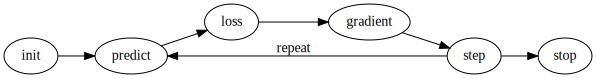

In [73]:
#@title 7 model training steps
gv('''
init->predict->loss->gradient->step->stop
step->predict[label=repeat]
''')

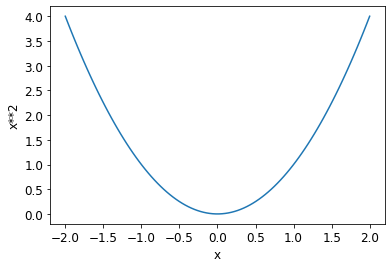

In [67]:
def f(x): return x**2
plot_function(f, 'x', 'x**2')